In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import mysql.connector
from sklearn.model_selection import train_test_split

In [2]:
db_connection = mysql.connector.connect(host="34.68.250.121", 
                                        database='NCAAWomens', user='wsa', password='LeBron>MJ!')

In [3]:
df = pd.read_sql('SELECT * FROM advancedScheduleStats WHERE team = "Michigan"', con=db_connection)

In [4]:
df.head()

,teamPerformanceID,seasonID,teamID,team,date,dateText,dateID,home,opponent,opponentTeamID,...,blockPercent,simpleRPI,margin,ptsScored,ptsAllowed,stealPercent,turnoverPercent,trueShootingPercent,foulRate,freeThrowRate
0,1190,4,1,Michigan,2018-11-09,None,3187,1,Mount St. Mary's,NaN,...,12.5,236,48,88,40,0.211082,0.197889,0.567888,0.224274,0.224274
1,1191,4,1,Michigan,2018-11-15,None,3193,0,Western Mich.,NaN,...,9.1,271,37,79,42,0.040872,0.163488,0.566667,0.245232,0.340599
2,1192,4,1,Michigan,2018-11-19,None,3197,1,Detroit Mercy,NaN,...,13.3,340,33,95,62,0.178117,0.152672,0.552840,0.229008,0.229008
3,1193,4,1,Michigan,2018-11-23,None,3201,0,Missouri,NaN,...,11.1,26,16,70,54,0.099857,0.271041,0.561010,0.271041,0.228245
4,1194,4,1,Michigan,2018-11-24,None,3202,0,Texas,NaN,...,2.3,25,-17,52,69,0.014948,0.209268,0.350027,0.254111,0.179372


In [5]:
# creates a row with 1 if a win, 0 if loss
def win(row):
    if row.ptsScored > row.ptsAllowed:
        return 1
    else:
        return 0

df['win'] = df[['ptsScored', 'ptsAllowed']].apply(win, axis=1)

In [6]:
# check to see if win is in the list of column names
df.columns

Index(['teamPerformanceID', 'seasonID', 'teamID', 'team', 'date', 'dateText',
       'dateID', 'home', 'opponent', 'opponentTeamID', 'win', 'offRtg',
       'defRtg', 'netRtg', 'pace', 'ptsPerScoringAttempt', 'ftPercent',
       '2PtPercent', '3PtPercent', 'offRebPercent', 'defRebPercent',
       'assistPercent', 'blockPercent', 'simpleRPI', 'margin', 'ptsScored',
       'ptsAllowed', 'stealPercent', 'turnoverPercent', 'trueShootingPercent',
       'foulRate', 'freeThrowRate'],
      dtype='object')

In [7]:
df[['ptsScored', 'ptsAllowed', 'win']]

,ptsScored,ptsAllowed,win
0,88,40,1
1,79,42,1
2,95,62,1
3,70,54,1
4,52,69,0
...,...,...,...
143,57,38,1
144,80,48,1
145,84,76,1
146,79,64,1


In [8]:
X = df[['home', 
        'pace', 
        'ftPercent', 
        '3PtPercent', 
        'offRebPercent', 
        'turnoverPercent', 
        'freeThrowRate', 
        'stealPercent']].fillna(0)
y = df['win']

In [9]:
# split data into training and test datasets (using 70-30 train-test split here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

**Note:** We don't have to set a `random_state`, but by setting a `random_state`, we can have reproducible splits, meaning that the train/test splits are the same every time we run this code.

In [10]:
# fitting the model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
# calculating the accuracy on the given test data and labels (from the documentation)
clf.score(X_test, y_test)

0.6826923076923077

In [12]:
# creating a confusion matrix (TP and TN are along the diagonals)
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 9 24]
 [ 9 62]]


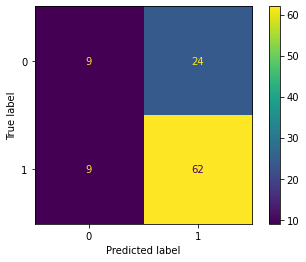

In [13]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

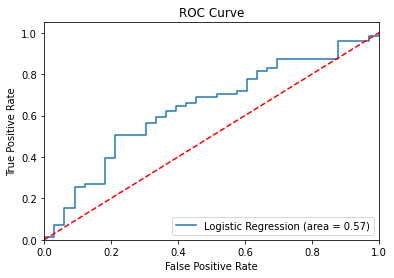

In [14]:
# creating an ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()